In [1]:
# source http://scikit-image.org/docs/dev/auto_examples/filters/plot_entropy.html
# http://scikit-image.org/docs/dev/auto_examples/features_detection/plot_glcm.html
%matplotlib inline

<div class="document" id="entropy">
<h1 class="title">Entropy</h1>
<p>In information theory, information entropy is the log-base-2 of the number of
possible outcomes for a message.</p>
<p>For an image, local entropy is related to the complexity contained in a given
neighborhood, typically defined by a structuring element. The entropy filter can
detect subtle variations in the local gray level distribution.</p>
<p>In the first example, the image is composed of two surfaces with two slightly
different distributions. The image has a uniform random distribution in the
range [-14, +14] in the middle of the image and a uniform random distribution in
the range [-15, 15] at the image borders, both centered at a gray value of 128.
To detect the central square, we compute the local entropy measure using a
circular structuring element of a radius big enough to capture the local gray
level distribution. The second example shows how to detect texture in the camera
image using a smaller structuring element.</p>
</div>


## Caractérisation de l'homogénéité rocheuse d'images du CT-scan

Les modules nécessaires de scikit - image

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data
from skimage.util import img_as_ubyte
from skimage.util import img_as_uint
from skimage.filters.rank import entropy
from skimage.morphology import disk
from skimage.feature import greycomatrix, greycoprops
import skimage.io as io
import glob

Les images se trouvent dans le même dossier que le script et ils sont en format .png de dimension égale. On initialise une liste de toutes les images avec glob

In [17]:
# Density CT scan images
im  = glob.glob("*.png") # ["all the .png files in the folder", ]
# Photo sample image
# im  = glob.glob("img/*.png") # ["all the .png files in the folder img", ]

On extrapole un masque (cercle) pour calculer l'entropie moyenne uniquement sur  l'image et pas sur les bords.

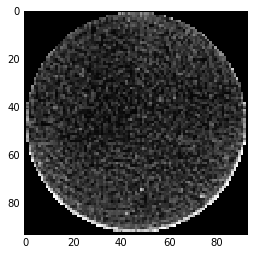

In [18]:
image_test = io.imread(str(im[10]),as_grey=True)
io.imshow(image_test)

nrows,ncols = image_test.shape
# ncols = 93
row, col = np.ogrid[:nrows, :ncols]
cnt_row, cnt_col = nrows / 2, ncols / 2
outer_disk_mask = ((row - cnt_row)**2 + (col - cnt_col)**2 >
                    (nrows / 2)**2)
inner_mask = np.invert(outer_disk_mask)

On produit l'image qui représente la numérisation (à gauche) avec l'identifiant de l'image et est entropie (à droite) avec la valeur moyenne sur l'image masquée. 

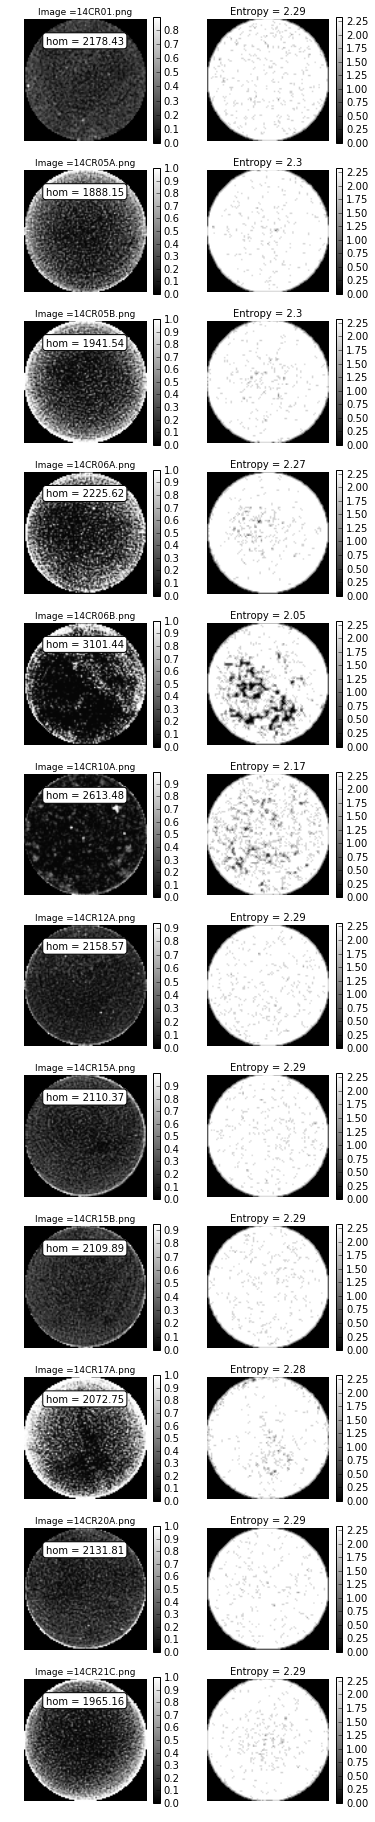

In [19]:
nrows = len(im)
# One fig for all samples
fig, axes = plt.subplots(nrows, 2,figsize=(6, 32), sharex=True,sharey=True,subplot_kw={"adjustable": "box-forced"})
bbox_props = dict(boxstyle="round,pad=0.3", lw=1,fc='white')

def main(): 
    for i,row in enumerate(axes):
        x = io.imread(im[i],as_grey=True)
        x1 = img_as_uint(x)
        x2 = img_as_ubyte(x)
        y = entropy(x1,disk(1))
        y_mean = np.mean(y[inner_mask])
        glcm = greycomatrix(x2, [1], [0], 256)
        hom = greycoprops(glcm, 'homogeneity')
        plot(row, x, y,y_mean,im[i],hom)

    plt.show()
    fig.savefig('CTScan_entropy.pdf',bbox_inches='tight')

def plot(axrow, x, y,y_mean,im,hom):
    im0 = axrow[0].imshow(x,  cmap=plt.cm.gray)
    axrow[0].set_title("Image ="+ str(im),fontsize=9)
    axrow[0].axis("off")
    axrow[0].text(46, 16, "hom = "+str(round(hom,2)), ha="center", va="center",size=10,bbox=bbox_props)
    fig.colorbar(im0, ax=axrow[0])
    im1 = axrow[1].imshow(y,  cmap=plt.cm.gray)
    axrow[1].set_title("Entropy = "+str(round(y_mean,2)),fontsize=10)
    axrow[1].axis("off")
    
    fig.colorbar(im1, ax=axrow[1])

main()

Create an image for each samples

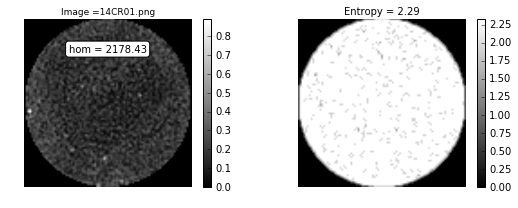

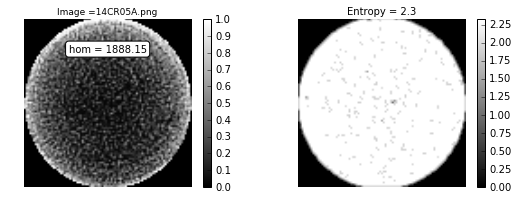

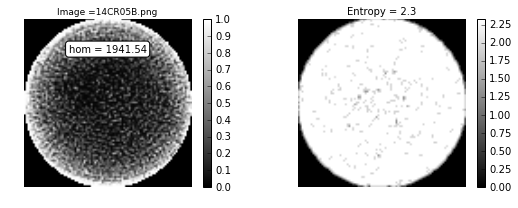

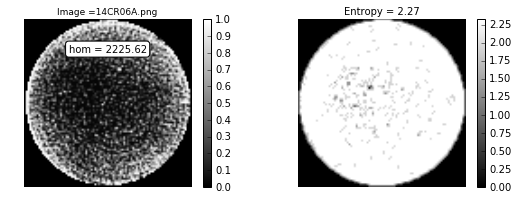

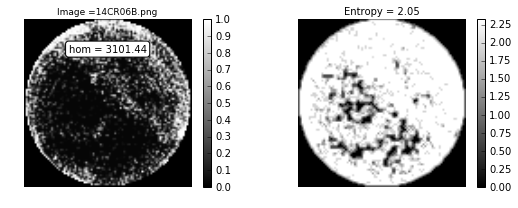

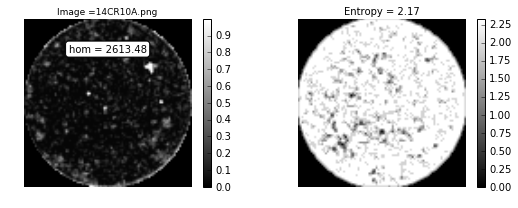

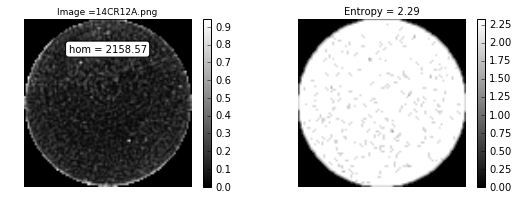

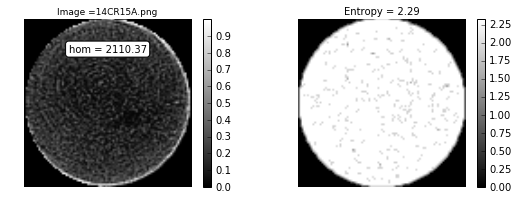

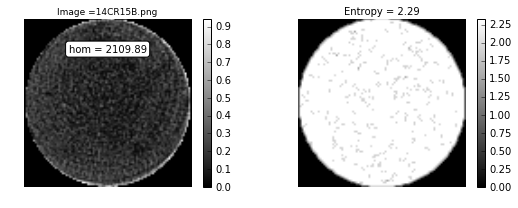

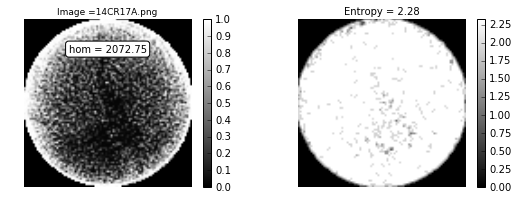

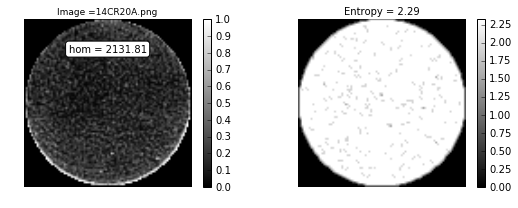

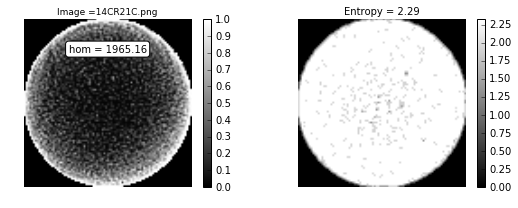

In [21]:
def plot_single(im):
    fig, axes = plt.subplots(1, 2,figsize=(9, 3), sharex=True,sharey=True,subplot_kw={"adjustable": "box-forced"})
    bbox_props = dict(boxstyle="round,pad=0.3", lw=1,fc='white')
    x = io.imread(im,as_grey=True)
    x1 = img_as_uint(x)
    x2 = img_as_ubyte(x)
    y = entropy(x1,disk(1))
    y_mean = np.mean(y[inner_mask])
    glcm = greycomatrix(x2, [1], [0], 256)
    hom = greycoprops(glcm, 'homogeneity')
    im0 = axes[0].imshow(x,  cmap=plt.cm.gray)
    axes[0].set_title("Image ="+ str(im),fontsize=9)
    axes[0].axis("off")
    axes[0].text(46, 16, "hom = "+str(round(hom,2)), ha="center", va="center",size=10,bbox=bbox_props)
    fig.colorbar(im0, ax=axes[0])
    im1 = axes[1].imshow(y,  cmap=plt.cm.gray)
    axes[1].set_title("Entropy = "+str(round(y_mean,2)),fontsize=10)
    axes[1].axis("off")
    fig.colorbar(im1, ax=axes[1])
    plt.show()
    fig.savefig('CTScan_entropy_'+str(im)[:7]+'.pdf',bbox_inches='tight')

for i in range(len(im)):    
    fig.clf()
    plot_single(im[i])

